# Employee Attrition Prediction

- Here we are trying to predict the weather an employee will resign from the organisation or not.
- Companies on YoY basis will usally face an attrition rate of 30%.

### This is a Classification Machine Learning problem

In [1]:
# Import libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import magic function
%matplotlib inline

In [2]:
df = pd.read_csv('E:\A.I course\Datasets\hr-analytics-case-study\general_data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df.shape

(4410, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Feature Engineering

In [7]:
# Convert the categorical variables into numerical
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()

In [8]:
# Since Attrition is out dependent variable we will convert it seperately
df['Attrition'] = labelEncoder_y.fit_transform(df['Attrition'])

In [9]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
# Converting all the independent variables
df['BusinessTravel']= labelEncoder_X.fit_transform(df['BusinessTravel'])
df['Department']= labelEncoder_X.fit_transform(df['Department'])
df['EducationField']= labelEncoder_X.fit_transform(df['EducationField'])
df['Gender']= labelEncoder_X.fit_transform(df['Gender'])
df['MaritalStatus']= labelEncoder_X.fit_transform(df['MaritalStatus'])
df['Over18']= labelEncoder_X.fit_transform(df['Over18'])
df['JobRole']= labelEncoder_X.fit_transform(df['JobRole'])

In [10]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


## Checking for missing values

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [12]:
# Replace the missing value with the mean
NumCompaniesWorked_mean = df['NumCompaniesWorked'].mean()
df['NumCompaniesWorked'].fillna(NumCompaniesWorked_mean, inplace=True)
TotalWorkingYears_mean = df['TotalWorkingYears'].mean()
df['TotalWorkingYears'].fillna(TotalWorkingYears_mean,inplace=True)

In [13]:
df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

### Evaluation: Trying to Find if there is correlation among the features

In [14]:
df.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,-0.010846,0.006963,-0.035706,0.043194,NaN,0.008649,-0.039352,...,0.298528,NaN,-0.033137,NaN,-0.031753,0.680419,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.048206,-0.009730,-0.015111,-0.057940,NaN,-0.004729,0.018125,...,0.042232,NaN,0.032533,NaN,-0.006839,-0.170111,-0.049431,-0.134392,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.010982,0.024616,0.002755,-0.015462,NaN,-0.002590,-0.039243,...,0.022365,NaN,-0.031054,NaN,0.003683,0.033960,-0.041888,-0.014575,-0.032591,-0.022636
Department,-0.010846,-0.048206,-0.010982,1.000000,0.012134,-0.004597,0.013720,NaN,-0.003455,0.003158,...,-0.003945,NaN,-0.007840,NaN,0.010512,-0.019814,0.012866,0.010078,0.014845,0.018016
DistanceFromHome,0.006963,-0.009730,0.024616,0.012134,1.000000,-0.008638,-0.024665,NaN,-0.001097,-0.044173,...,-0.013818,NaN,0.038125,NaN,0.011169,0.009361,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,0.002755,-0.004597,-0.008638,1.000000,0.012329,NaN,-0.009680,-0.016547,...,-0.016219,NaN,-0.040531,NaN,0.001261,-0.010712,0.010472,0.006080,0.022490,0.005358
EducationField,0.043194,-0.057940,-0.015462,0.013720,-0.024665,0.012329,1.000000,NaN,-0.000819,-0.005634,...,0.008992,NaN,-0.011214,NaN,0.021620,0.021578,-0.021793,0.023120,0.048181,0.021664
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.004729,-0.002590,-0.003455,-0.001097,-0.009680,-0.000819,NaN,1.000000,-0.013165,...,-0.001114,NaN,-0.004456,NaN,-0.014254,-0.001061,-0.010191,0.004086,0.000256,0.008579
Gender,-0.039352,0.018125,-0.039243,0.003158,-0.044173,-0.016547,-0.005634,NaN,-0.013165,1.000000,...,-0.066796,NaN,0.011841,NaN,0.019237,-0.027571,-0.030167,-0.017277,-0.021812,0.004438


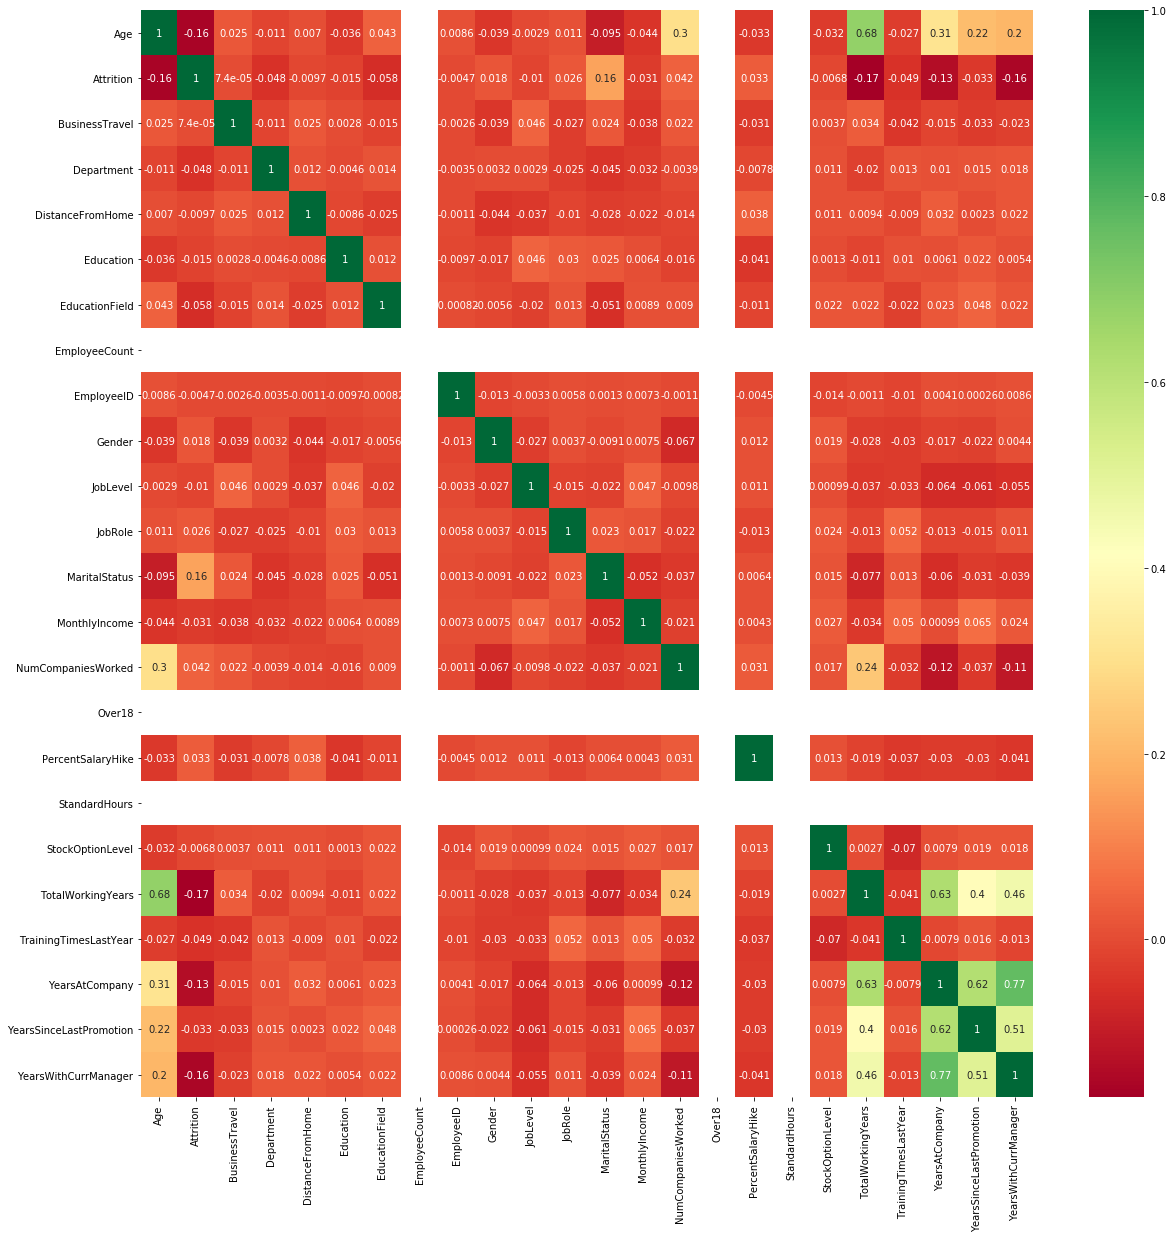

In [15]:
# Heatmap

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [16]:
# Taking feature that have most correlation with the Attrition variable.
# Here we have excluded few variables that do not have a significant correlation

X = df[['Age', 'EducationField', 'Gender', 'JobLevel',
          'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y = df["Attrition"]

In [17]:
X.head(5)

,Age,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [18]:
X.shape

(4410, 15)

In [19]:
y.head(5)

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int32

# Building the Model: Perform Train Test split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [21]:
# Standardize the data using standard scalar

from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.fit_transform(X_test)

In [22]:
X_train, X_test

(array([[-0.86016933, -0.9279455 ,  0.81688236, ...,  0.65784844,
          0.26111376,  1.67185507],
        [-0.3104886 ,  2.08312989, -1.22416648, ...,  0.33256613,
          1.81563509,  0.82621999],
        [ 1.7782982 , -0.9279455 ,  0.81688236, ...,  4.23595387,
         -0.36069477,  1.38997671],
        ...,
        [ 0.56900058,  0.5775922 , -1.22416648, ..., -0.80592196,
         -0.04979051, -1.14692853],
        [-0.64029704,  1.33036104,  0.81688236, ...,  0.49520728,
         -0.67159904,  1.10809835],
        [ 1.22861747,  2.08312989, -1.22416648, ..., -0.96856312,
         -0.67159904, -1.14692853]]),
 array([[-1.22208667,  0.51729735, -1.22706227, ...,  0.12952035,
          1.45182854,  0.73174029],
        [-0.79033003, -0.22943958,  0.81495457, ...,  0.29556242,
          1.14304803,  0.73174029],
        [ 1.26051398,  2.0107712 ,  0.81495457, ..., -0.36860588,
         -0.70963503, -1.19399055],
        ...,
        [-1.00620835,  0.51729735,  0.81495457, ..., -

In [23]:
len(y_test)

882

# Support Vector Classifier

In [30]:
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=0, tol=1e-5)

In [31]:
model.fit(X_train,y_train)

C:\Users\HI\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [32]:
# Model Prediction
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
predicted_y = model.predict(X_test)

In [34]:
model.score(X_test, y_test)

0.8333333333333334

In [35]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(predicted_y, y_test) 
  
print('Confusion Matrix :')
print(results) 
print("Accuracy Score: ", accuracy_score(y_test, predicted_y))
print("Classification Report: \n", classification_report(y_test, predicted_y))

Confusion Matrix :
[[735 145]
 [  2   0]]
Accuracy Score:  0.8333333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       737
           1       0.00      0.00      0.00       145

    accuracy                           0.83       882
   macro avg       0.42      0.50      0.45       882
weighted avg       0.70      0.83      0.76       882

